<a href="https://colab.research.google.com/github/aneetalr/DSML-DL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [6]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_train)

(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [8]:
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 55s 28ms/step - loss: 0.0074 - accuracy: 0.9524
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0028 - accuracy: 0.9826
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0019 - accuracy: 0.9878
Epoch 4/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0014 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0011 - accuracy: 0.9937


1/1 [==============================] - 0s 98ms/step
DIGIT IS: 3


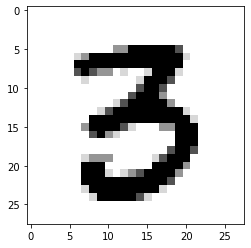

In [10]:
image_index = 5555
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("DIGIT IS:",pred.argmax())


In [12]:
import cv2
img=cv2.imread("/content/sample_data/download.jpg")
img=cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)  
img = img[:,:,0]
img=img/255




1/1 [==============================] - 0s 19ms/step
digit is 2


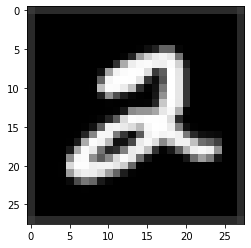

In [13]:
plt.imshow(img.reshape(28, 28),cmap='Greys')
pred = model.predict(img.reshape(1, 28, 28, 1))
print("digit is",pred.argmax())

In [14]:
import cv2
img=cv2.imread("/content/sample_data/download.png")
img=cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)  
img = img[:,:,0]
img=img/255




1/1 [==============================] - 0s 24ms/step
digit is 4


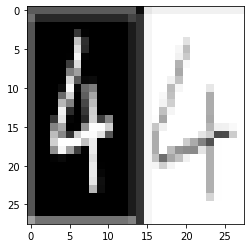

In [15]:
plt.imshow(img.reshape(28, 28),cmap='Greys')
pred = model.predict(img.reshape(1, 28, 28, 1))
print("digit is",pred.argmax())